# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Load-Classification-data" data-toc-modified-id="Load-Classification-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Classification data</a></div><div class="lev1 toc-item"><a href="#Process-classification-data" data-toc-modified-id="Process-classification-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Process classification data</a></div><div class="lev2 toc-item"><a href="#Isolate-classifications-since-the-project-went-live" data-toc-modified-id="Isolate-classifications-since-the-project-went-live-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Isolate classifications since the project went live</a></div><div class="lev2 toc-item"><a href="#Initialize-arrays-to-store-parsed-data" data-toc-modified-id="Initialize-arrays-to-store-parsed-data-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Initialize arrays to store parsed data</a></div><div class="lev2 toc-item"><a href="#Extract-annotation-data" data-toc-modified-id="Extract-annotation-data-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Extract annotation data</a></div><div class="lev2 toc-item"><a href="#Store-extracted-data" data-toc-modified-id="Store-extracted-data-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Store extracted data</a></div><div class="lev1 toc-item"><a href="#Plot-some-of-the-muon-ring-properties" data-toc-modified-id="Plot-some-of-the-muon-ring-properties-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot some of the muon ring properties</a></div><div class="lev2 toc-item"><a href="#First-in-SVG-Space." data-toc-modified-id="First-in-SVG-Space.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>First in SVG Space.</a></div><div class="lev2 toc-item"><a href="#Now-in-angular-camera-coordinates" data-toc-modified-id="Now-in-angular-camera-coordinates-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Now in angular camera coordinates</a></div>

In [1]:
import json
import getpass
import io
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as mplplot
%matplotlib inline
from IPython.core.display import display

### ESAP and Zooniverse Clients
Change the next cell from "raw" to "code" to install the clients on a new instance.

In [2]:
from shopping_client import shopping_client
from zooniverse import zooniverse
from panoptes_client import Subject

Broken libmagic installation detected. The python-magic module is installed but can't be imported. Please check that both python-magic and the libmagic shared library are installed correctly. Uploading media other than images may not work.


## Retrieve my saved shopping

In [3]:
zooniverseUsername = input("Enter Zooniverse account username")
zooniversePassword = getpass.getpass("Enter Zooniverse account password")
zooniverseConnector = zooniverse(username="hughdickinson", password=zooniversePassword)
shoppingClient = shopping_client(host="https://sdc-dev.astron.nl:5555/", connectors=[zooniverseConnector])
basket = shoppingClient.get_basket(convert_to_pandas=True)
basket

Enter Zooniverse account usernamehughdickinson
Enter Zooniverse account password········
Enter your ESAP access token:········


{'zooniverse':       archive   catalog project_id         category workflow_id
 0  zooniverse   project      16261  classifications         NaN
 1  zooniverse  workflow      16261         subjects       18725
 2  zooniverse  workflow      16261  classifications       18802
 3  zooniverse   project      13619  classifications         NaN}

Render basket `DataFrame` nicely.

In [4]:
basket["zooniverse"]

,archive,catalog,project_id,category,workflow_id
0,zooniverse,project,16261,classifications,NaN
1,zooniverse,workflow,16261,subjects,18725
2,zooniverse,workflow,16261,classifications,18802
3,zooniverse,project,13619,classifications,NaN


Select an item of interest.

In [5]:
item = basket["zooniverse"].iloc[0]
item

archive             zooniverse
catalog                project
project_id               16261
category       classifications
workflow_id                NaN
Name: 0, dtype: object

**Workaround!** Dummy item for Muon Hunter classifications while pagination is broken!

In [6]:
item = pd.Series(json.loads({"item_data":'{"archive":"zooniverse","catalog":"workflow","project_id":"3098","workflow_id":"2473","category":"classifications"}'}["item_data"]))

In [7]:
item

archive             zooniverse
catalog               workflow
project_id                3098
workflow_id               2473
category       classifications
dtype: object

In [8]:
if zooniverseConnector.is_available(item):
    print("Item is available")
else:
    print("Retrieval Failed")

Item is available


# Load Classification data
Use `pandas` for data manipulation.

### Workaround for low-memory environments
Attempting to retrieve the full classification set for Muon Hunter crashes this notebook. The following cell contains a workaround that uses less memory and will soon be built into the client. Change the cell from "raw" to "code" and run it to regenerate data file loaded in the cell after.

In [9]:
classificationDataFrame = pd.read_pickle("muonHunterJustInCase.pkl")

###  Retrieved data

In [10]:
classificationDataFrame

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
0,15934989,hughdickinson,1460166.0,17b3d4aecaf3ebab5c12,2473,Find those muons!,15.240,2016-08-22 16:09:01 UTC,NaN,NaN,{'session': '6049552d100cae2a9570c40bee1119cfb...,"[{'task': 'T1', 'task_label': 'Can you see a m...","{""3353122"":{""retired"":{""id"":3630649,""workflow_...",3353122
1,15934992,hughdickinson,1460166.0,17b3d4aecaf3ebab5c12,2473,Find those muons!,15.240,2016-08-22 16:09:07 UTC,NaN,NaN,{'session': '6049552d100cae2a9570c40bee1119cfb...,"[{'task': 'T1', 'task_label': 'Can you see a m...","{""3353255"":{""retired"":{""id"":3629819,""workflow_...",3353255
2,15935073,hughdickinson,1460166.0,17b3d4aecaf3ebab5c12,2473,Find those muons!,15.240,2016-08-22 16:10:26 UTC,NaN,NaN,{'session': '6049552d100cae2a9570c40bee1119cfb...,"[{'task': 'T1', 'task_label': 'Can you see a m...","{""3354054"":{""retired"":{""id"":3629492,""workflow_...",3354054
3,15935265,hughdickinson,1460166.0,17b3d4aecaf3ebab5c12,2473,Find those muons!,23.360,2016-08-22 16:14:27 UTC,NaN,NaN,{'session': 'b22c0dbd0ba6beb5e88adba3cd7058a17...,"[{'task': 'T1', 'task_label': 'Can you see a m...","{""3353468"":{""retired"":{""id"":3629322,""workflow_...",3353468
4,15935296,hughdickinson,1460166.0,17b3d4aecaf3ebab5c12,2473,Find those muons!,24.360,2016-08-22 16:15:15 UTC,NaN,NaN,{'session': '14fb4368e2cd74dc3ad8bfcebff3ffe3b...,"[{'task': 'T1', 'task_label': 'Can you see a m...","{""3353666"":{""retired"":{""id"":3629050,""workflow_...",3353666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,30420350,dmoola,432159.0,21583f27c032d9811e90,2473,Find those muons!,46.136,2017-02-28 17:16:31 UTC,NaN,NaN,{'session': 'eefcff68c563b9b583ee39a4cc730211d...,"[{'task': 'T1', 'task_label': 'Can you see a m...","{""6266907"":{""retired"":{""id"":4104501,""workflow_...",6266907
99995,30420351,jdemulder,1403362.0,4c9c59c9bd2bc48a647e,2473,Find those muons!,46.136,2017-02-28 17:16:31 UTC,NaN,NaN,{'session': 'd9afa45628a1b439e4460a2750c567b4c...,"[{'task': 'T1', 'task_label': 'Can you see a m...","{""6290577"":{""retired"":{""id"":4092724,""workflow_...",6290577
99996,30420352,PandaLion98,1553876.0,b8bcc07398061b363590,2473,Find those muons!,46.136,2017-02-28 17:16:31 UTC,NaN,NaN,{'session': '2a1602195efbb6d41d870fc857a62241a...,"[{'task': 'T1', 'task_label': 'Can you see a m...","{""6291175"":{""retired"":{""id"":4107354,""workflow_...",6291175
99997,30420353,not-logged-in-99c19adffe7d8fca87ef,NaN,99c19adffe7d8fca87ef,2473,Find those muons!,46.136,2017-02-28 17:16:31 UTC,NaN,NaN,{'session': '141e609d9f80f92569c5e4f26f05bf062...,"[{'task': 'T1', 'task_label': 'Can you see a m...","{""5499434"":{""retired"":{""id"":3681634,""workflow_...",5499434


# Process classification data
## Isolate classifications since the project went live

In [11]:
annotationsAndSubjects = classificationDataFrame[
    (classificationDataFrame.created_at > "2017-01-23T00:00:00.00Z") & 
    (classificationDataFrame.workflow_id == 2473)][['annotations', 'subject_ids', 'subject_data']]

## Initialize arrays to store parsed data
Extracted data are:
1. The subject IDs - These can be used to reference the original events.
2. The ring indices - Some classifiers may have drawn multiple rings for the same subject - in this case the ring index enumerates those multiple rings (`int` or `NaN`)
3. The geometrical properties of each ring:
    1. The ring centre coordinates (`float` or `NaN`)
    2. The ring radius (`float` or `NaN`)
    3. The ring angle - this is superflous, since the ring is circular(`float` or `NaN`).
4. The camera containment of each ring:
    1. Whether the ring is fully contained within the camera (`Boolean`).
    2. Whether the portion of the ring in the camera is complete (`Boolean`).
5. The initial classification of the subject - derived from the filename:
    1. Whether the initial classification was *Muon* (`Boolean`).
    2. Whether the initial classification was *Non-Muon* (`Boolean`).
    3. Whether the initial classification was *Ambiguous* (`Boolean`).
6. The filename (`str`).

In [12]:
parsedAnnotations = []
subjectIds = []
ringIndices = []
ringPresent = []
ringCentre = []
ringRadius = []
ringAngle = []
containedRing = []
completeRing = []
initialMuon = []
initialNonMuon = []
initialAmbiguous = []
fileName = []

## Extract annotation data
Note that some care must be taken to ensure that expected data are present and supply a suitable null value otherwise. Zooniverse data dumps are not very intelligent!

In [13]:
for annotationsAndSubject in annotationsAndSubjects.iterrows() :
    annotation = annotationsAndSubject[1].annotations
    subjectData = json.loads(annotationsAndSubject[1].subject_data)
    try:
        subjectDatum = next(iter(subjectData.values()))
        currentFileName = subjectDatum[list(subjectDatum.keys())[-1]]
        if not currentFileName.endswith(".jpeg"):
            print(currentFileName)
    except KeyError as e:
        pass

    for task in annotation :
        if 'T1' in task['task'] :
            if 'value' in task and task['value'] is not None and 'Yes' not in task['value']:
                subjectIds.append(int(annotationsAndSubject[1].subject_ids))
                ringIndices.append(None)
                ringPresent.append(False)
                ringCentre.append((None, None))
                ringRadius.append(None)
                ringAngle.append(None)
                containedRing.append(False)
                completeRing.append(False)
                parsedAnnotations.append(annotation)
                fileName.append(currentFileName)
                initialNonMuon.append('non_muon' in currentFileName)
                initialMuon.append('muon' in currentFileName and not initialNonMuon[-1])
                initialAmbiguous.append(not (initialMuon[-1] or initialNonMuon[-1]))
                continue
        elif 'T0' in task['task'] : # there must be a ring
            for ringIndex, ringData in enumerate(task['value']) :
                subjectIds.append(int(annotationsAndSubject[1].subject_ids))
                ringIndices.append(ringIndex)
                ringPresent.append(True)
                ringCentre.append((ringData['x'] if 'x' in ringData else None, ringData['y'] if 'y' in ringData else None))
                ringRadius.append(ringData['r'] if 'r' in ringData else None)
                ringAngle.append(ringData['angle'] if 'angle' in ringData else None)
                containedRing.append(None)
                completeRing.append(None)
                parsedAnnotations.append(annotation)
                fileName.append(currentFileName)
                initialNonMuon.append('non_muon' in currentFileName)
                initialMuon.append('muon' in currentFileName and not initialNonMuon[-1])
                initialAmbiguous.append(not (initialMuon[-1] or initialNonMuon[-1]))
                for nestedTask in annotation :
                    if 'T3' in nestedTask['task'] :
                        containedRing[-1] = ('Yes' in nestedTask['value'])
                    if 'T5' in nestedTask['task'] :
                        completeRing[-1] = ('Yes' in nestedTask['value'])

## Store extracted data
Use a `pandas.DataFrame` since this makes subsequent manipulation more straightforward.

In [14]:
classificationsFrame = pd.DataFrame({'subjectId' : subjectIds, 
                                     'ringIndex' : ringIndices, 
                                     'ringPresent' : ringPresent, 
                                     'ringCentreX' : [x for x, _ in ringCentre], 
                                     'ringCentreY' : [y for _, y in ringCentre],
                                     'ringAngle' : ringAngle, 
                                     'ringRadius' : ringRadius,
                                     'containedRing' : containedRing, 
                                     'completeRing' : completeRing, 
                                     'initialNonMuon' : initialNonMuon,
                                     'initialMuon' : initialMuon,
                                     'initialAmbiguous' : initialAmbiguous,
                                     'fileName' : fileName,
                                     'fullAnnotation': parsedAnnotations}).set_index('subjectId')
display(classificationsFrame)

,ringIndex,ringPresent,ringCentreX,ringCentreY,ringAngle,ringRadius,containedRing,completeRing,initialNonMuon,initialMuon,initialAmbiguous,fileName,fullAnnotation
subjectId,,,,,,,,,,,,,
3354037,0.0,True,1059.710693,401.327789,-16.389520,49.163883,False,True,False,False,True,ambiguous_events_run47511_evt12752.jpeg,"[{'task': 'T1', 'task_label': 'Can you see a m..."
3354037,1.0,True,1353.805054,878.537476,-15.255120,537.775956,False,True,False,False,True,ambiguous_events_run47511_evt12752.jpeg,"[{'task': 'T1', 'task_label': 'Can you see a m..."
3353267,NaN,False,NaN,NaN,NaN,NaN,False,False,True,False,False,random_non_muon_run47511_evt11964.jpeg,"[{'task': 'T1', 'task_label': 'Can you see a m..."
3353941,NaN,False,NaN,NaN,NaN,NaN,False,False,False,False,True,ambiguous_events_run47511_evt10979.jpeg,"[{'task': 'T1', 'task_label': 'Can you see a m..."
3354130,NaN,False,NaN,NaN,NaN,NaN,False,False,False,False,True,ambiguous_events_run47511_evt14867.jpeg,"[{'task': 'T1', 'task_label': 'Can you see a m..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266907,NaN,False,NaN,NaN,NaN,NaN,False,False,False,False,True,78576_ambiguous_evt11400_tel2.jpeg,"[{'task': 'T1', 'task_label': 'Can you see a m..."
6290577,0.0,True,453.118225,565.867676,51.146624,285.109092,True,None,False,False,True,78599hide_label_evt247800_tel1.jpeg,"[{'task': 'T1', 'task_label': 'Can you see a m..."
6291175,0.0,True,543.913269,624.596680,-77.735229,250.997097,True,None,False,False,True,78599hide_label_evt501773_tel1.jpeg,"[{'task': 'T1', 'task_label': 'Can you see a m..."


# Plot some of the muon ring properties
## First in SVG Space.

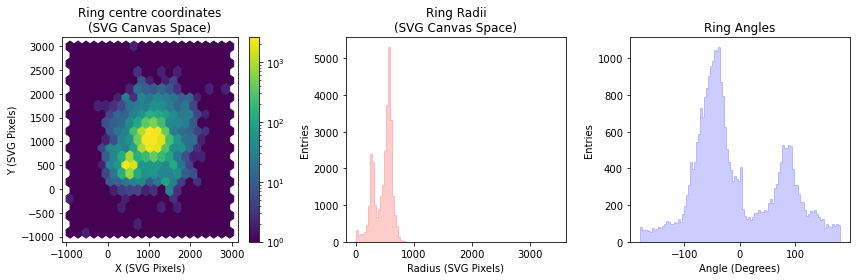

In [15]:
withRingCut = classificationsFrame['ringPresent']
withRingFigure = mplplot.figure(figsize=(12,4))

ringCentreAxes = withRingFigure.add_subplot(1, 3, 1)
ringCentreAxes = classificationsFrame[withRingCut].plot.hexbin(ax=ringCentreAxes, x='ringCentreX', y='ringCentreY', gridsize=20, cmap='viridis', sharex=False, norm=matplotlib.colors.LogNorm())
ringCentreAxes.set_ylabel('Y (SVG Pixels)')
ringCentreAxes.set_xlabel('X (SVG Pixels)')
ringCentreAxes.set_title('Ring centre coordinates\n(SVG Canvas Space)')

ringRadiusAxes = withRingFigure.add_subplot(1, 3, 2)
ringRadiusAxes = classificationsFrame[withRingCut].ringRadius.plot.hist(ax=ringRadiusAxes, bins=100, histtype='step', fill=True, alpha=0.2, color='r', facecolor='r')
ringRadiusAxes.set_ylabel('Entries')
ringRadiusAxes.set_xlabel('Radius (SVG Pixels)')
ringRadiusAxes.set_title('Ring Radii\n(SVG Canvas Space)')

ringAngleAxes = withRingFigure.add_subplot(1, 3, 3)
ringAngleAxes = classificationsFrame[withRingCut].ringAngle.plot.hist(ax=ringAngleAxes, bins=100, range=(-180, 180),histtype='step', fill=True, alpha=0.2, color='b', facecolor='b')
ringAngleAxes.set_ylabel('Entries')
ringAngleAxes.set_xlabel('Angle (Degrees)')
ringAngleAxes.set_title('Ring Angles')

mplplot.tight_layout()

## Now in angular camera coordinates

In [16]:
class SVGToVERITASCamera :
    
    defaultCameraCentreSVG = (1050, 1050)
    # vertex-to-vertex diameter
    defaultPixelV2VDiameterSVG = 75
    defaultPixelV2VDiameterDegrees = 0.144
    # face-to-face diameter
    defaultPixelF2FDiameterSVG = 60
    # camera dimensions
    defaultCameraWidthSVG = 1620
    defaultCameraHeightSVG = 1640
    
    
    def __init__(self) :
        self.svgPixelsPerDegree = SVGToVERITASCamera.defaultPixelV2VDiameterSVG/SVGToVERITASCamera.defaultPixelV2VDiameterDegrees
    
    def mapSVGPixelCoordsToDegrees(self, coordinates) :
        return ((coordinates[0] - SVGToVERITASCamera.defaultCameraCentreSVG[0]/2)/self.svgPixelsPerDegree,
                (coordinates[1] - SVGToVERITASCamera.defaultCameraCentreSVG[1]/2)/self.svgPixelsPerDegree)
    
    def mapSVGPixelLengthToDegrees(self, length) :
        return length/self.svgPixelsPerDegree
    
    # TODO: Add more mappings as required

In [17]:
coordMapper = SVGToVERITASCamera()
# I dare you to try and work out what's happening here!
mappedX, mappedY, mappedR = zip(*tuple([tuple([*coordMapper.mapSVGPixelCoordsToDegrees(coords), coordMapper.mapSVGPixelLengthToDegrees(radius)]) for coords, radius in zip(zip(classificationsFrame.ringCentreX, classificationsFrame.ringCentreY),classificationsFrame.ringRadius)]))

In [18]:
classificationsFrame['ringCentreXDeg'] = mappedX
classificationsFrame['ringCentreYDeg'] = mappedY
classificationsFrame['ringRadiusDeg'] = mappedR
display(classificationsFrame)

,ringIndex,ringPresent,ringCentreX,ringCentreY,ringAngle,ringRadius,containedRing,completeRing,initialNonMuon,initialMuon,initialAmbiguous,fileName,fullAnnotation,ringCentreXDeg,ringCentreYDeg,ringRadiusDeg
subjectId,,,,,,,,,,,,,,,,
3354037,0.0,True,1059.710693,401.327789,-16.389520,49.163883,False,True,False,False,True,ambiguous_events_run47511_evt12752.jpeg,"[{'task': 'T1', 'task_label': 'Can you see a m...",1.026645,-0.237451,0.094395
3354037,1.0,True,1353.805054,878.537476,-15.255120,537.775956,False,True,False,False,True,ambiguous_events_run47511_evt12752.jpeg,"[{'task': 'T1', 'task_label': 'Can you see a m...",1.591306,0.678792,1.032530
3353267,NaN,False,NaN,NaN,NaN,NaN,False,False,True,False,False,random_non_muon_run47511_evt11964.jpeg,"[{'task': 'T1', 'task_label': 'Can you see a m...",NaN,NaN,NaN
3353941,NaN,False,NaN,NaN,NaN,NaN,False,False,False,False,True,ambiguous_events_run47511_evt10979.jpeg,"[{'task': 'T1', 'task_label': 'Can you see a m...",NaN,NaN,NaN
3354130,NaN,False,NaN,NaN,NaN,NaN,False,False,False,False,True,ambiguous_events_run47511_evt14867.jpeg,"[{'task': 'T1', 'task_label': 'Can you see a m...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266907,NaN,False,NaN,NaN,NaN,NaN,False,False,False,False,True,78576_ambiguous_evt11400_tel2.jpeg,"[{'task': 'T1', 'task_label': 'Can you see a m...",NaN,NaN,NaN
6290577,0.0,True,453.118225,565.867676,51.146624,285.109092,True,None,False,False,True,78599hide_label_evt247800_tel1.jpeg,"[{'task': 'T1', 'task_label': 'Can you see a m...",-0.138013,0.078466,0.547409
6291175,0.0,True,543.913269,624.596680,-77.735229,250.997097,True,None,False,False,True,78599hide_label_evt501773_tel1.jpeg,"[{'task': 'T1', 'task_label': 'Can you see a m...",0.036313,0.191226,0.481914


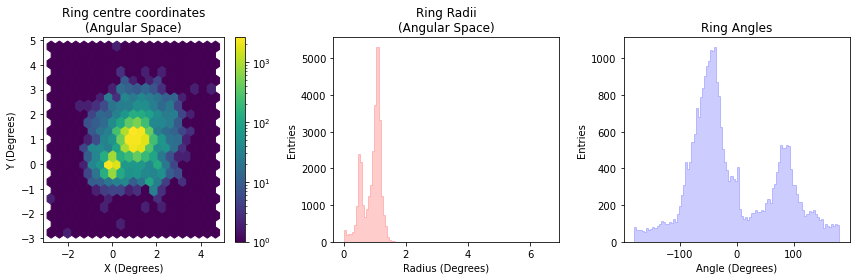

In [19]:
withRingFigure = mplplot.figure(figsize=(12,4))

ringCentreAxes = withRingFigure.add_subplot(1, 3, 1)
ringCentreAxes = classificationsFrame[withRingCut].plot.hexbin(ax=ringCentreAxes, x='ringCentreXDeg', y='ringCentreYDeg', gridsize=20, cmap='viridis', sharex=False, norm=matplotlib.colors.LogNorm())
ringCentreAxes.set_ylabel('Y (Degrees)')
ringCentreAxes.set_xlabel('X (Degrees)')
ringCentreAxes.set_title('Ring centre coordinates\n(Angular Space)')

ringRadiusAxes = withRingFigure.add_subplot(1, 3, 2)
ringRadiusAxes = classificationsFrame[withRingCut].ringRadiusDeg.plot.hist(ax=ringRadiusAxes, bins=100, histtype='step', fill=True, alpha=0.2, color='r', facecolor='r')
ringRadiusAxes.set_ylabel('Entries')
ringRadiusAxes.set_xlabel('Radius (Degrees)')
ringRadiusAxes.set_title('Ring Radii\n(Angular Space)')

ringAngleAxes = withRingFigure.add_subplot(1, 3, 3)
ringAngleAxes = classificationsFrame[withRingCut].ringAngle.plot.hist(ax=ringAngleAxes, bins=100, range=(-180, 180),histtype='step', fill=True, alpha=0.2, color='b', facecolor='b')
ringAngleAxes.set_ylabel('Entries')
ringAngleAxes.set_xlabel('Angle (Degrees)')
ringAngleAxes.set_title('Ring Angles')

mplplot.tight_layout()

## Check whether volunteers agree with automatic classification

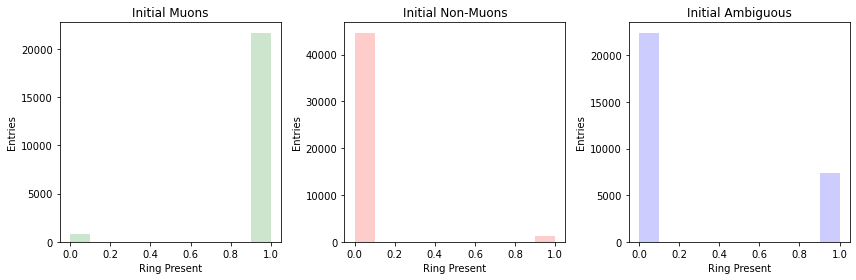

In [20]:
agreementFigure = mplplot.figure(figsize=(12,4))

nonMuonAxes = agreementFigure.add_subplot(1, 3, 2)
nonMuonAxes = classificationsFrame[classificationsFrame['initialNonMuon']].ringPresent.astype(int).plot.hist(ax=nonMuonAxes, fill=True, alpha=0.2, color='r', facecolor='r')
nonMuonAxes.set_ylabel('Entries')
nonMuonAxes.set_xlabel('Ring Present')
nonMuonAxes.set_title('Initial Non-Muons')

muonAxes = agreementFigure.add_subplot(1, 3, 1)
muonAxes = classificationsFrame[classificationsFrame['initialMuon']].ringPresent.astype(int).plot.hist(ax=muonAxes, fill=True, alpha=0.2, color='g', facecolor='g')
muonAxes.set_ylabel('Entries')
muonAxes.set_xlabel('Ring Present')
muonAxes.set_title('Initial Muons')

ambiguousAxes = agreementFigure.add_subplot(1, 3, 3)
ambiguousAxes = classificationsFrame[classificationsFrame['initialAmbiguous']].ringPresent.astype(int).plot.hist(ax=ambiguousAxes, fill=True, alpha=0.2, color='b', facecolor='b')
ambiguousAxes.set_ylabel('Entries')
ambiguousAxes.set_xlabel('Ring Present')
ambiguousAxes.set_title('Initial Ambiguous')

mplplot.tight_layout()

## Do some simple aggregation
We'll plot some aggregated volunteer annotations over the images

In [21]:
subjectMeans = classificationsFrame.groupby(by="subjectId")[["ringPresent", "ringRadius", "ringCentreX", "ringCentreY"]].mean()

Find some examples wehere at least 80% of volunteers marked a ring.

In [22]:
markedMuonSubjects = [Subject.find(sid) for sid in subjectMeans[subjectMeans.ringPresent > 0.8].index[:16]]

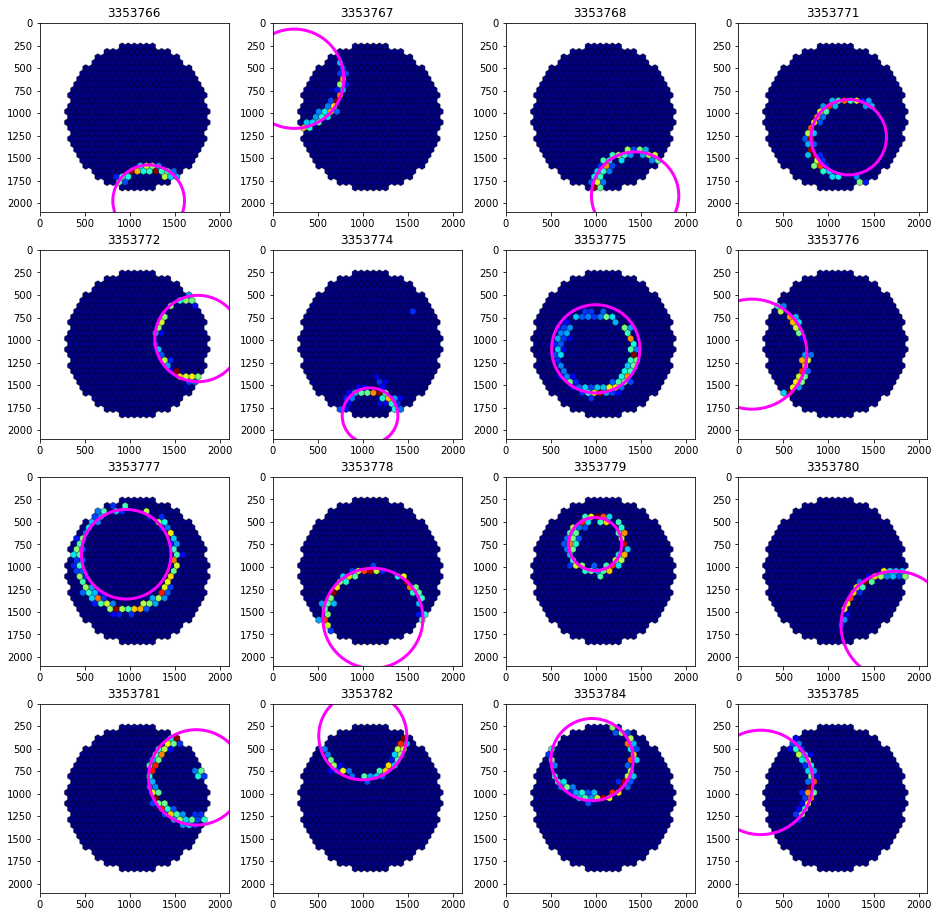

In [23]:
fig, panels = mplplot.subplots(figsize=(16, 16), nrows=4, ncols=4)

for subject, panel in zip(markedMuonSubjects, panels.flatten()):
    panel.imshow(mplplot.imread(list(subject.locations[0].values())[0],format="jpeg"))
    ring = matplotlib.patches.Circle((subjectMeans.loc[int(subject.id)].ringCentreX, 
                                     subjectMeans.loc[int(subject.id)].ringCentreY), 
                                     subjectMeans.loc[int(subject.id)].ringRadius, 
                                     fc="none", 
                                     ec="magenta", 
                                     lw=3)
    panel.set_title(subject.id)
    panel.add_patch(ring)